### The sin(x) with pytorch

In [1]:
import torch
import torch.nn as nn

import numpy as np

from torch.nn import functional as F
import torch.optim as optim

from matplotlib import pyplot as plt

#### -3.14 ~ 3.14 사이에 200개의 난수를 생성

In [2]:
# true data 생성
# N is 200 for 140 train sample and 60 test sample로 나누어줄 예정
N = 200

x = np.linspace(-np.pi,np.pi,N).reshape(N,1)
print(x[:10])

[[-3.14159265]
 [-3.11001886]
 [-3.07844506]
 [-3.04687127]
 [-3.01529747]
 [-2.98372368]
 [-2.95214988]
 [-2.92057608]
 [-2.88900229]
 [-2.85742849]]


#### x 값을 sin graph 에 대입하여 그에 맞는 y 값을 가져옴 (sin y 값)
#### y 값에 가우시안 분포 난수를 + - 를 하여 noise 를 생성

In [3]:
# x data 를 sin 그래프에 대입
sin_y = np.sin(x)

# add noise (가우시안 분포를 따르는 난수를 더하거나 뺀다)
y = sin_y + 0.1*np.random.randn(N,1)

#### 그래프를 그려서 noise 가 어떻게 생성되었는지 확인해보자

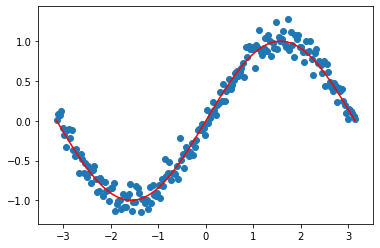

In [4]:
# show
plt.figure()

# sin 그래프
plt.plot(x, sin_y, c='r')

# scatter 가 아닌 plot 을 하면 그래프가 직선으로 이어진다
plt.scatter(x,y)
plt.show()

#### 200개의 샘플을 이용해 feature 를 만들기로 하자

In [5]:
# ^1~^4까지 만들도록 한다
n_feature = 5 # for loop 은 마지막은 포함하지 않으므로 5로 설정해주어야 4승까지 feature 를 만들어준다.

PHI = np.ones(200).reshape(-1, 1) # 200개의 샘플이므로 np.ones('200') <- 200, 이백, 일렬로 펼쳐주어야 하므로 reshape

In [6]:
# np.ones(200) 은 대략 이렇게 생겼습니다.
np.ones(200)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
PHI

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [8]:
for i in range(1, n_feature): # i <- 1,2,3,4
    PHI = np.concatenate((PHI, np.power(x, i)), axis=1) # 기존 PHI (1 이 200개 있는것) 에 X 의 1승부터 4승까지 차례대로 붙여준다

&emsp;&emsp;$y = x^{0} + x^{1} + x^{2} + x^{3} + x^{4}$<br><br>

In [9]:
print("The shape of PHI => {}".format(PHI.shape))
print("The number of X_data samples => {0} \nthe number of features => {1}".format(PHI.shape[0],PHI.shape[1]))
print("The number of y_data samples => {}".format(y.shape[0]))

The shape of PHI => (200, 5)
The number of X_data samples => 200 
the number of features => 5
The number of y_data samples => 200


In [10]:
PHI # x^0 + x^1 + x^2 + x^3 + x^4 

array([[ 1.00000000e+00, -3.14159265e+00,  9.86960440e+00,
        -3.10062767e+01,  9.74090910e+01],
       [ 1.00000000e+00, -3.11001886e+00,  9.67221730e+00,
        -3.00807782e+01,  9.35517875e+01],
       [ 1.00000000e+00, -3.07844506e+00,  9.47682400e+00,
        -2.91738821e+01,  8.98101932e+01],
       [ 1.00000000e+00, -3.04687127e+00,  9.28342452e+00,
        -2.82853994e+01,  8.61819708e+01],
       [ 1.00000000e+00, -3.01529747e+00,  9.09201884e+00,
        -2.74151414e+01,  8.26648066e+01],
       [ 1.00000000e+00, -2.98372368e+00,  8.90260697e+00,
        -2.65629192e+01,  7.92564109e+01],
       [ 1.00000000e+00, -2.95214988e+00,  8.71518892e+00,
        -2.57285439e+01,  7.59545179e+01],
       [ 1.00000000e+00, -2.92057608e+00,  8.52976467e+00,
        -2.49118267e+01,  7.27568853e+01],
       [ 1.00000000e+00, -2.88900229e+00,  8.34633423e+00,
        -2.41125787e+01,  6.96612951e+01],
       [ 1.00000000e+00, -2.85742849e+00,  8.16489760e+00,
        -2.33306110e+01

In [11]:
np.power(x, 1)[:5] # X 의 1승

array([[-3.14159265],
       [-3.11001886],
       [-3.07844506],
       [-3.04687127],
       [-3.01529747]])

In [12]:
np.power(x, 2)[:5] # X 의 2승

array([[9.8696044 ],
       [9.6722173 ],
       [9.476824  ],
       [9.28342452],
       [9.09201884]])

In [13]:
np.power(x, 3)[:5] # X 의 3승

array([[-31.00627668],
       [-30.08077819],
       [-29.17388206],
       [-28.28539942],
       [-27.41514142]])

In [14]:
np.power(x, 4)[:5] # X 의 4승

array([[97.40909103],
       [93.55178745],
       [89.81019319],
       [86.18197078],
       [82.66480662]])

**shuffle data**

In [15]:
# shuffle data
np.random.seed(10)

# N은 200이므로 1~200까지의 수를 섞어준다 (permutation(N))
idx = np.random.permutation(N)
print(idx)

[ 59   5  20 198  52  19 162  55  69   2  98  10  75 142 124  63 109  78
 111 185 154 130  61  87 102 121 136   1  47 172 159  39  76  91  35 178
 127 169  46 174 190   7  26 138  58  72 103 199  56 116  24  43 101 163
  21  60 175  70  90  49 119 110  95 167 193  68 165 114  67  66 120  38
 196 161  99 152  83 166 117  41  80  81  32 170  48  25  53 105  17 194
  51  14  82  84 184  29   3  23 147 188  37 189 186 187  45 132  97 179
 191  42 129 131  79 160 177 143 168  12 112  11  22 106  85 146   6 128
 149 155 148 104  34 108  50 134 144 145   4 133  44  96 176  28 135 171
 180  71 118 192 197 137  74 182  94 151 150 173  93  18  27  36  57  31
  65 140  89 158  30  86  92 141 126 153  13  77 181 183  33  62 122 107
  88  54 139 100  16 115 164  40   0  73   8 195 157 156 123 113  64  15
 125   9]


In [16]:
shuffle_X = x[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

In [17]:
print(shuffle_X.shape)
print(shuffle_PHI.shape)
print(shuffle_y.shape)

(200, 1)
(200, 5)
(200, 1)


### Split train and test

In [18]:
# train data 140개
n=140

# train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

print(PHI_train.shape)

# test data 60개
X_test = shuffle_X[n:]
PHI_test = shuffle_PHI[n:]
y_test = shuffle_y[n:]

print(PHI_test.shape)

(140, 5)
(60, 5)


#### train 과 test 로 구분해서 그래프를 그려준다

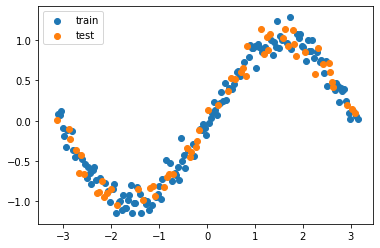

In [19]:
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

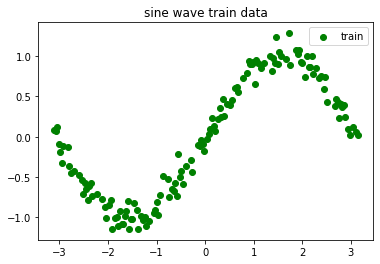

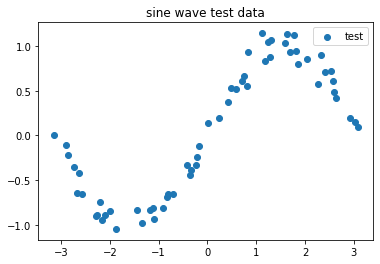

In [20]:
# plot
plt.scatter(X_train, y_train, label='train', c='g')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

### Make data to tensor

ts_whole_X = train, test 를 포함한 모든 X data의 tensor 형태

In [21]:
ts_whole_X = torch.tensor(PHI, dtype=torch.float)

ts_train_X = torch.tensor(PHI_train, dtype=torch.float)
ts_train_y = torch.tensor(y_train, dtype=torch.float)

ts_test_X = torch.tensor(PHI_test, dtype=torch.float)
ts_test_y = torch.tensor(y_test, dtype=torch.float)

### ANN architecture

In [22]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(5, 64) # input layer
        self.fc2 = nn.Linear(64, 64) # hidden layer1
        self.fc3 = nn.Linear(64, 64) # hidden layer2
        self.fc4 = nn.Linear(64, 64) # hidden layer3
        self.fc5 = nn.Linear(64, 64) # hidden layer4
        self.fc6 = nn.Linear(64, 64) # hidden layer5
        self.fc7 = nn.Linear(64, 16) # hidden layer6
        self.fc8 = nn.Linear(16, 16) # hidden layer7
        self.fc9 = nn.Linear(16, 1) # output layer

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = F.tanh(self.fc3(x))
        x = F.tanh(self.fc4(x))
        x = F.tanh(self.fc5(x))
        x = F.tanh(self.fc6(x))
        x = F.tanh(self.fc7(x))
        x = F.tanh(self.fc8(x))
        x = torch.tanh(self.fc9(x))
        
        return x
    
model = ANN()

In [23]:
# class ANN(nn.Module):
#     def __init__(self):
#         super(ANN, self).__init__()
#         self.fc1 = nn.Linear(5, 64) # input layer
#         self.fc2 = nn.Linear(64, 64) # hidden layer1
#         self.fc3 = nn.Linear(64, 64) # hidden layer2
#         self.fc4 = nn.Linear(64, 64) # hidden layer3
#         self.fc5 = nn.Linear(64, 64) # hidden layer4
#         self.fc6 = nn.Linear(64, 64) # hidden layer5
#         self.fc7 = nn.Linear(64, 16) # hidden layer6
#         self.fc8 = nn.Linear(16, 16) # hidden layer7
#         self.fc9 = nn.Linear(16, 1) # output layer

#     def forward(self, x):
#         x = F.sigmoid(self.fc1(x))
#         x = F.sigmoid(self.fc2(x))
#         x = F.sigmoid(self.fc3(x))
#         x = F.sigmoid(self.fc4(x))
#         x = F.sigmoid(self.fc5(x))
#         x = F.sigmoid(self.fc6(x))
#         x = F.sigmoid(self.fc7(x))
#         x = F.sigmoid(self.fc8(x))
#         x = torch.sigmoid(self.fc9(x))
        
#         return x
    
# model = ANN()

## 1. SGD optimizer 로 training

#### Loss Function & Optimizer (SGD)

In [24]:
loss_function = nn.MSELoss() # mean squared error
optimizer = optim.SGD(model.parameters(), lr= 1e-1)

#### train model-SGD

In [25]:
loss_arr = []
epoch = 100

for num_epoch in range(epoch):
    
    optimizer.zero_grad()
    
    prediction = model(ts_train_X)
    loss = loss_function(prediction, ts_train_y) # (예측값, 실제값)

    loss.backward()
    
    optimizer.step()
    
    loss_arr.append(loss.item())
    
    if num_epoch % 20 == 0:
        print("epoch ==> {}\tloss ==> {:.5f}".format(num_epoch, loss))
        
print("Finish train")

/home/edu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch ==> 0	loss ==> 0.56859
epoch ==> 20	loss ==> 0.28553
epoch ==> 40	loss ==> 0.05722
epoch ==> 60	loss ==> 0.02901
epoch ==> 80	loss ==> 0.01640
Finish train


### test model

In [26]:
with torch.no_grad(): # we don't need gradients (testing phase)
    predicted_test = model(ts_test_X)
    predicted_whole = model(ts_whole_X)
    
print("Finish test")

Finish test


### Loss 값 확인

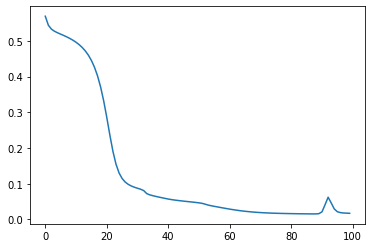

In [27]:
plt.figure()
plt.plot(loss_arr)
plt.show()          

### Visualization

In [28]:
y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)

### Test data 확인

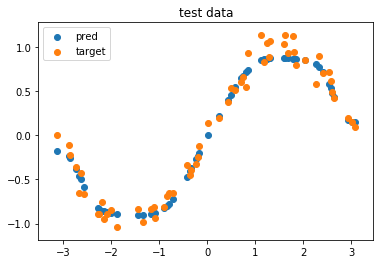

In [29]:
plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

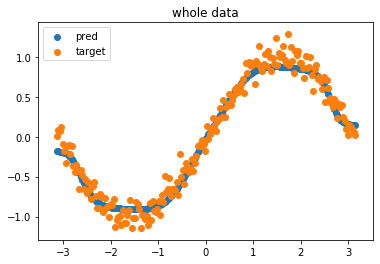

In [30]:
plt.figure()
plt.scatter(x, y_whole_pred, label='pred')
plt.scatter(x, y, label='target')
plt.legend()
plt.title('whole data')
plt.show()

## 2. ADAM optimizer

### Loss Function & Optimizer (ADAM)

In [31]:
model = ANN()

In [32]:
loss_function = nn.MSELoss() # mean squared error
optimizer = optim.Adam(model.parameters(), lr= 1e-3)

### train model-ADAM

In [33]:
loss_arr = []
epoch = 100

for num_epoch in range(epoch):
    prediction = model(ts_train_X)
    loss = loss_function(prediction, ts_train_y) # (예측값, 실제값)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_arr.append(loss.item())
    
    if num_epoch % 20 == 0:
        print("epoch ==> {}\tloss ==> {:.5f}".format(num_epoch, loss))
        
print("Finish train")

/home/edu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch ==> 0	loss ==> 0.52566
epoch ==> 20	loss ==> 0.08797
epoch ==> 40	loss ==> 0.06024
epoch ==> 60	loss ==> 0.05294
epoch ==> 80	loss ==> 0.05002
Finish train


### test model

In [34]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted_test = model(ts_test_X)
    predicted_whole = model(ts_whole_X)
    
print("Finish test")

Finish test


### Loss 값 확인

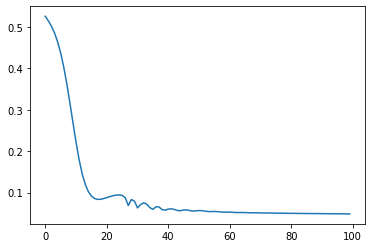

In [35]:
plt.figure()
plt.plot(loss_arr)
plt.show()          

### Visualization

In [36]:
y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)

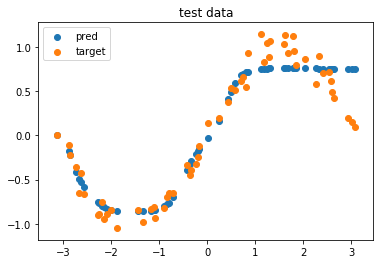

In [37]:
### Visualization

y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)
plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

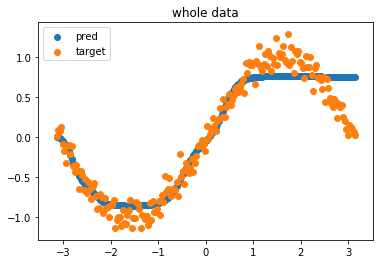

In [38]:
plt.figure()
plt.scatter(x, y_whole_pred, label='pred')
plt.scatter(x, y, label='target')
plt.legend()
plt.title('whole data')
plt.show()

## 3. ADAM의 Lr 을 다양하게 바꿔가면서 비교

In [39]:
model = ANN()

In [40]:
loss_function = nn.MSELoss() # mean squared error
optimizer = optim.Adam(model.parameters(), lr= 1e-1)

### train model-ADAM

In [41]:
loss_arr = []

# 100 epoch
for step in range(100):
    prediction = model(ts_train_X)
    loss = loss_function(prediction, ts_train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_arr.append(loss.item())
    
    if step % 20 ==0:
        print("loss => %.5f"%loss.item())

print("Finish train")

/home/edu/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


loss => 0.56386
loss => 0.22285
loss => 0.24197
loss => 0.22784
loss => 0.21952
Finish train


### test model

In [42]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted_test = model(ts_test_X)
    predicted_whole = model(ts_whole_X)
    
print("Finish test")

Finish test


### Visualization

In [43]:
y_test_pred = np.array(predicted_test)
y_whole_pred = np.array(predicted_whole)

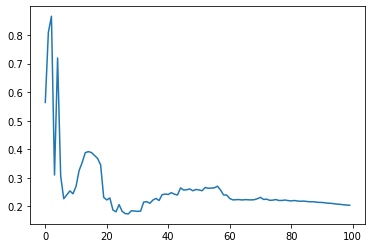

In [44]:
plt.figure()
plt.plot(loss_arr)
plt.show()          

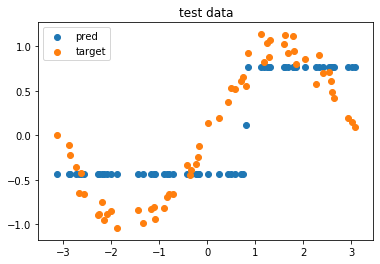

In [45]:
plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

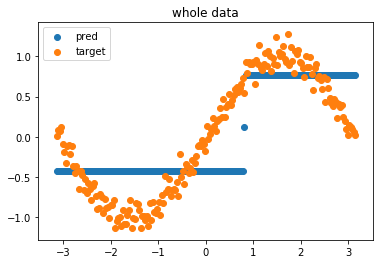

In [46]:
plt.figure()
plt.scatter(x, y_whole_pred, label='pred')
plt.scatter(x, y, label='target')
plt.legend()
plt.title('whole data')
plt.show()